___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers.
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information.
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones.
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations.
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words
- Create Word Cloud


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews.


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [3]:
import tensorflow as tf
import os

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [4]:
strategy = tf.distribute.TPUStrategy(resolver)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import trim_mean
import re
import string

from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import pickle


In [7]:
!pip install torch

In [6]:
import torch

In [8]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from warnings import filterwarnings
filterwarnings('ignore')
import nltk

In [9]:
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Womens Clothing E-Commerce Reviews.csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


### Data Wrangling

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [13]:
df.shape

(23486, 11)

In [14]:
#type of variables
df.dtypes

Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

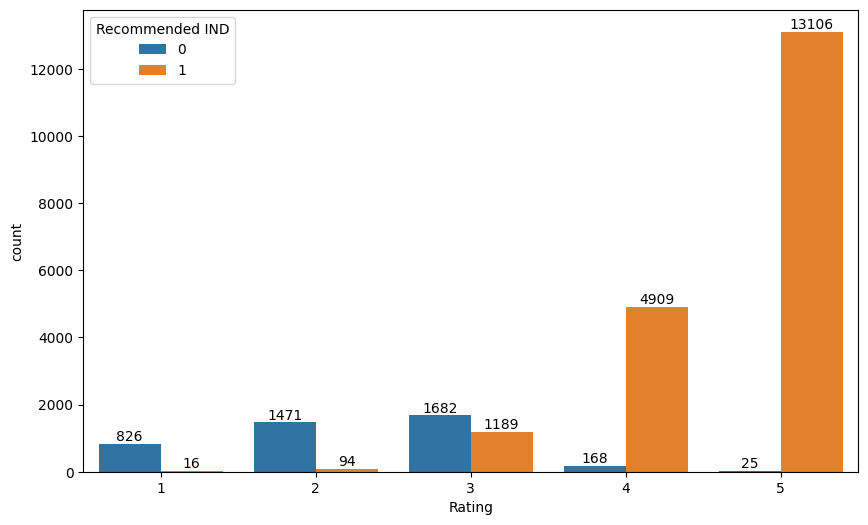

In [15]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x="Rating", data=df, hue = "Recommended IND")
for p in ax.containers:
    ax.bar_label(p)

In [16]:
df["Recommended IND"].unique()

array([1, 0])

In [17]:
df = df[~((df["Rating"] == 1) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 2) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 3) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 4) & (df["Recommended IND"] == 0))]
df = df[~((df["Rating"] == 5) & (df["Recommended IND"] == 0))]

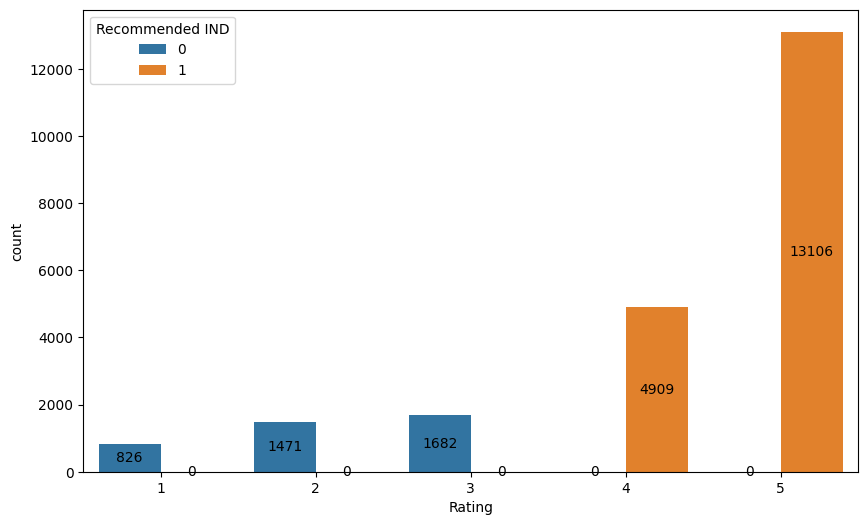

In [18]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x="Rating", data=df, hue = "Recommended IND")
for p in ax.containers:
  ax.bar_label(p, label_type="center")

In [19]:
df['Review Text'][2]

'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c'

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

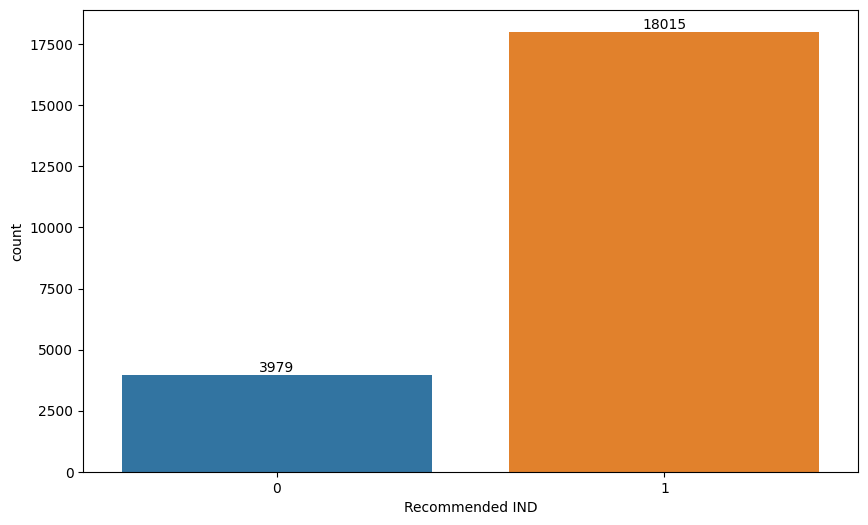

In [20]:
plt.fig = plt.figure(figsize = (10,6))
ax = sns.countplot(x="Recommended IND", data=df)
ax.bar_label(ax.containers[0]);

The target value is imbalanced, there are more positive reviews than negative.

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [21]:
df= df[['Review Text', 'Rating', 'Recommended IND', 'Positive Feedback Count', 'Age', 'Class Name', 'Department Name']]
df.head()

,Review Text,Rating,Recommended IND,Positive Feedback Count,Age,Class Name,Department Name
0,Absolutely wonderful - silky and sexy and comf...,4,1,0,33,Intimates,Intimate
1,Love this dress! it's sooo pretty. i happene...,5,1,4,34,Dresses,Dresses
2,I had such high hopes for this dress and reall...,3,0,0,60,Dresses,Dresses
3,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,50,Pants,Bottoms
4,This shirt is very flattering to all due to th...,5,1,6,47,Blouses,Tops


In [22]:
df= df.rename(columns={"Recommended IND": "Recommended", "Review Text": "Review"})
df.head()

,Review,Rating,Recommended,Positive Feedback Count,Age,Class Name,Department Name
0,Absolutely wonderful - silky and sexy and comf...,4,1,0,33,Intimates,Intimate
1,Love this dress! it's sooo pretty. i happene...,5,1,4,34,Dresses,Dresses
2,I had such high hopes for this dress and reall...,3,0,0,60,Dresses,Dresses
3,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,50,Pants,Bottoms
4,This shirt is very flattering to all due to th...,5,1,6,47,Blouses,Tops


In [23]:
df=df[['Review','Recommended']]
df.head()

,Review,Recommended
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


---
---


### Missing Value Detection

In [24]:
df.isnull().sum()


Review         819
Recommended      0
dtype: int64

In [25]:
#Delete the missing values
df.dropna(subset=['Review'], inplace=True)

In [26]:
df.isnull().sum()

Review         0
Recommended    0
dtype: int64

In [27]:
df.shape

(21175, 2)

In [28]:
df

,Review,Recommended
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
...,...,...
23478,I was surprised at the positive reviews for th...,0
23479,So i wasn't sure about ordering this skirt bec...,1
23481,I was very happy to snag this dress at such a ...,1
23483,"This fit well, but the top was very see throug...",0


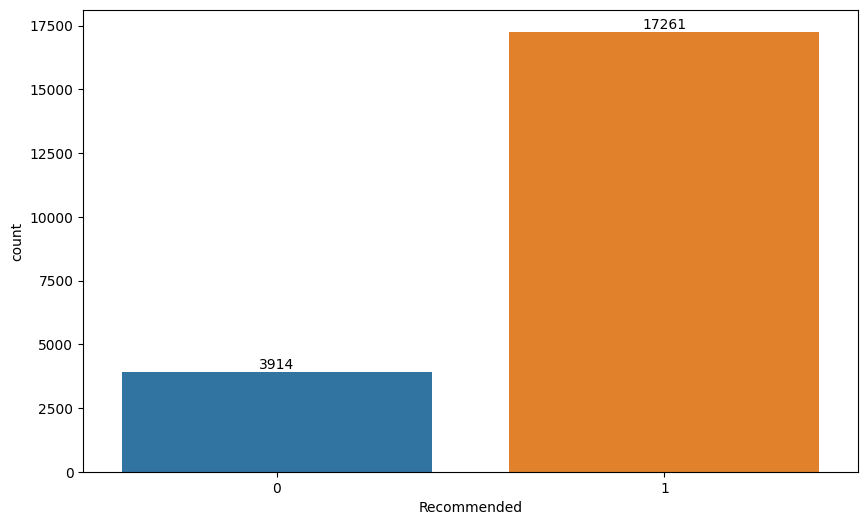

In [29]:
plt.fig = plt.figure(figsize = (10,6))
ax = sns.countplot(x="Recommended", data=df)
ax.bar_label(ax.containers[0]);

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma).
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method.


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [30]:
def tokens(words):
    words = re.sub("[^a-zA-Z]"," ", words)
    text = words.lower().split()
    return " ".join(text)

In [31]:
# Show some stop words
stop_words = stopwords.words('english')
print(stop_words[::10])

['i', "you've", 'himself', 'they', 'that', 'been', 'a', 'while', 'through', 'in', 'here', 'few', 'own', 'just', 're', 'doesn', 'ma', "shouldn't"]


In [32]:
#clothing stopwords
clothes =['dress','color','wear','top','sweater','material','shirt','jeans','pant',
          'skirt','order','white','black','fabric','blouse','sleeve','even', 'jacket']

In [33]:
def stopwords(review):
    text = [word.lower() for word in review.split() if word.lower() not in stop_words and word.lower() not in clothes]
    return " ".join(text)

In [34]:
#Removing all numbers (weight, size etc.)
#We remove numbers from text, since numbers doesn't give much importance to get the main words:
def remove_numbers(text):
    new_text = []
    for word in text.split():
        if not re.search('\d', word):
            new_text.append(word)
    return ' '.join(new_text)

In [35]:
# Normalization
# The next step is the normalization of words in the corpus by transform all of different forms of the word into one. The two methods that exist for this purpose are Stemming and Lemmatization. We used the Lemmatization one.
lem = WordNetLemmatizer()

def lemmatize(text):
    lem_text = [lem.lemmatize(word) for word in text.split()]
    return " ".join(lem_text)

In [36]:
import re
# Apply all functions to data:
df['Review'] = df['Review'].apply(tokens)
df['Review'] = df['Review'].apply(stopwords)
df['Review'] = df['Review'].apply(remove_numbers)
df['Review'] = df['Review'].apply(lemmatize)

In [37]:
df.head()

,Review,Recommended
0,absolutely wonderful silky sexy comfortable,1
1,love sooo pretty happened find store glad bc n...,1
2,high hope really wanted work initially ordered...,0
3,love love love jumpsuit fun flirty fabulous ev...,1
4,flattering due adjustable front tie perfect le...,1


In [38]:
df['Review'][1]

'love sooo pretty happened find store glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite'

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words
- Create Word Cloud


### Detect Reviews (positive and negative separately)

In [39]:
positive = df[df.Recommended == 1]
negative = df[df.Recommended == 0]
positive.head()

,Review,Recommended
0,absolutely wonderful silky sexy comfortable,1
1,love sooo pretty happened find store glad bc n...,1
3,love love love jumpsuit fun flirty fabulous ev...,1
4,flattering due adjustable front tie perfect le...,1
6,aded basket hte last mintue see would look lik...,1


In [40]:
negative.head()

,Review,Recommended
2,high hope really wanted work initially ordered...,0
5,love tracy reese dress one petite foot tall us...,0
10,run small esp zipper area run ordered sp typic...,0
22,first pullover styling side zipper purchased k...,0
25,loved didnt really look long purchased large m...,0


### Collect Words (positive and negative separately)

In [41]:
positive_words =[]

for review in positive.Review:
    positive_words.append(review)
positive_words = ' '.join(positive_words)
positive_words[:1000]

'absolutely wonderful silky sexy comfortable love sooo pretty happened find store glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite love love love jumpsuit fun flirty fabulous every time get nothing great compliment flattering due adjustable front tie perfect length legging sleeveless pair well cardigan love aded basket hte last mintue see would look like person store pick went teh darkler pale hte really gorgeous turn mathced everythiing trying prefectly little baggy hte x hte msallet size bummer petite decided jkeep though said matvehd everything ejans pant skirt waas trying kept oops ordered carbon store pick ton stuff always try used pair skirt pant everything went really nice charcoal shimmer went well pencil skirt flare pant etc compaint bit big sleeve long go petite also bit loose xx kept wil ldecide later since light already sold hte smallest size love usually get x run little snug bust ordered

In [42]:
negative_words = []

for review in negative.Review:
    negative_words.append(review)
negative_words = ' '.join(negative_words)
negative_words[:455]

'high hope really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok overall half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c love tracy reese dress one petite foot tall usually p brand pretty package lot long full overwhelmed small frame stranger alteration shortening narrowing would tak'

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [43]:
!pip install wordcloud

In [44]:
from wordcloud import WordCloud

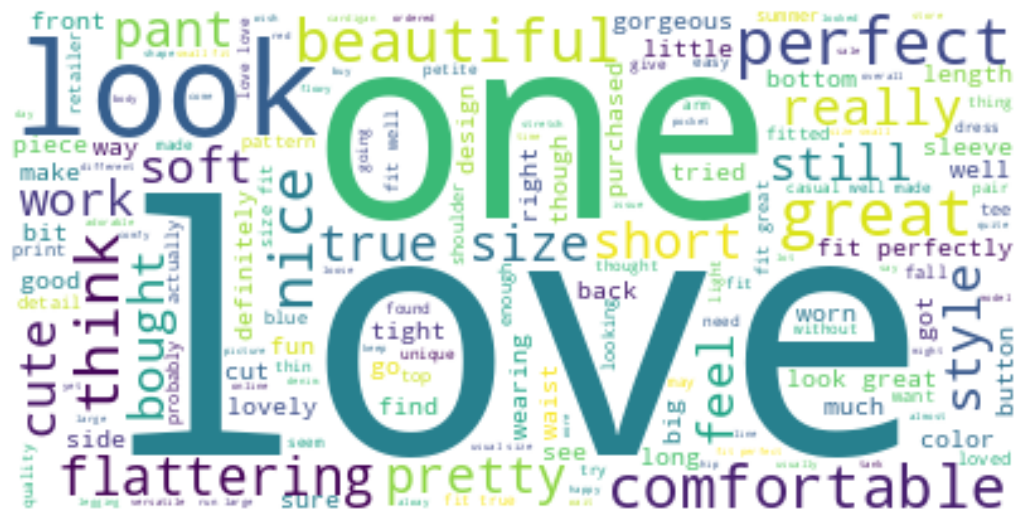

In [45]:
wordcloud = WordCloud(background_color="white", max_words=len(positive_words))

wordcloud.generate(positive_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

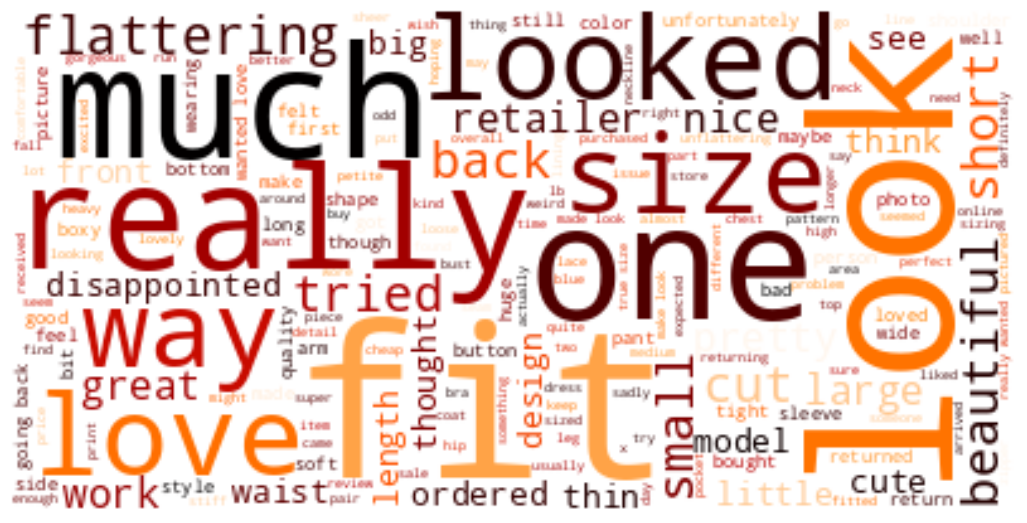

In [46]:
wordcloud = WordCloud(background_color="white", max_words=len(negative_words), colormap='gist_heat')

wordcloud.generate(negative_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.**

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X = df["Review"]
y = df["Recommended"]

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

## Logistic Regression

### CountVectorizer

In [85]:
model_log = imbpipeline(steps=[('vect', CountVectorizer(min_df=5, ngram_range=(1, 2))),
                               ('tfidf', TfidfTransformer()),
                               ('smote', SMOTE()),
                               ('clf', LogisticRegression())])

model_log.fit(X_train, y_train)

ytest = np.array(y_test)
predictions = model_log.predict(X_test)

In [86]:
print('accuracy %s' % accuracy_score(predictions, y_test))
print(classification_report(ytest, predictions))

accuracy 0.9171192443919717
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       783
           1       0.96      0.94      0.95      3452

    accuracy                           0.92      4235
   macro avg       0.85      0.88      0.87      4235
weighted avg       0.92      0.92      0.92      4235



## Stochastic Gradient Descent

In [52]:
model_sg = imbpipeline(steps=[('vect', CountVectorizer(min_df=5, ngram_range=(1, 2))),
                              ('tfidf', TfidfTransformer()),
                              ('smote', SMOTE()),
                              ('clf',  SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42))])


model_sg.fit(X_train, y_train)

ytest = np.array(y_test)
y_predict = model_sg.predict(X_test)

In [53]:
print('accuracy %s' % accuracy_score(y_predict, y_test))
print(classification_report(ytest, y_predict))

accuracy 0.9001180637544274
              precision    recall  f1-score   support

           0       0.68      0.87      0.76       783
           1       0.97      0.91      0.94      3452

    accuracy                           0.90      4235
   macro avg       0.82      0.89      0.85      4235
weighted avg       0.91      0.90      0.90      4235



## Naive Bayes

### Countvectorizer

In [54]:
model_nb = imbpipeline(steps=[('vect', CountVectorizer(min_df=5, ngram_range=(1, 2))),
                              ('tfidf', TfidfTransformer()),
                               ('smote', SMOTE()),
                               ('clf', MultinomialNB())])

model_nb.fit(X_train, y_train)

ytest = np.array(y_test)
pred_y = model_nb.predict(X_test)

In [55]:
print('accuracy %s' % accuracy_score(pred_y, y_test))
print(classification_report(ytest, pred_y))

accuracy 0.8975206611570248
              precision    recall  f1-score   support

           0       0.67      0.88      0.76       783
           1       0.97      0.90      0.93      3452

    accuracy                           0.90      4235
   macro avg       0.82      0.89      0.85      4235
weighted avg       0.92      0.90      0.90      4235



## Support Vector Machine (SVM)

### Countvectorizer

In [92]:
from sklearn.svm import SVC
from imblearn.pipeline import make_pipeline

model_svm = make_pipeline(
    CountVectorizer(min_df=5, ngram_range=(1, 2)),
                    TfidfTransformer(),
                    SMOTE(),
                    SVC(kernel='linear', C=1))

model_svm.fit(X_train, y_train)

ytest = np.array(y_test)
ypred = model_svm.predict(X_test)

In [93]:
print('accuracy %s' % accuracy_score(ypred, y_test))
print(classification_report(ytest, ypred))

accuracy 0.9166469893742621
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       783
           1       0.95      0.94      0.95      3452

    accuracy                           0.92      4235
   macro avg       0.86      0.87      0.86      4235
weighted avg       0.92      0.92      0.92      4235



## Random Forest

### Countvectorizer

In [78]:
model_rf = imbpipeline(steps=[('vect', CountVectorizer(min_df=5, ngram_range=(1, 2))),
                              ('tfidf', TfidfTransformer()),
                              ('smote', SMOTE()),
                              ('clf',  RandomForestClassifier(n_estimators=50))])


model_rf.fit(X_train, y_train)

ytest = np.array(y_test)
pred = model_rf.predict(X_test)

In [79]:
print('accuracy %s' % accuracy_score(pred, y_test))
print(classification_report(ytest, pred))

accuracy 0.8845336481700118
              precision    recall  f1-score   support

           0       0.75      0.57      0.65       792
           1       0.91      0.96      0.93      3443

    accuracy                           0.88      4235
   macro avg       0.83      0.76      0.79      4235
weighted avg       0.88      0.88      0.88      4235



## Ada Boosting

### Countvectorizer

In [60]:
ada = imbpipeline(steps=[('vect', CountVectorizer(min_df=5, ngram_range=(1, 2))),
                         ('tfidf', TfidfTransformer()),
                         ('smote', SMOTE()),
                         ('clf',  AdaBoostClassifier())])


ada.fit(X_train, y_train)

ytest = np.array(y_test)
ada_pred = ada.predict(X_test)

In [61]:
print('accuracy %s' % accuracy_score(ada_pred, y_test))
print(classification_report(ytest, ada_pred))

accuracy 0.8630460448642266
              precision    recall  f1-score   support

           0       0.62      0.66      0.64       783
           1       0.92      0.91      0.92      3452

    accuracy                           0.86      4235
   macro avg       0.77      0.78      0.78      4235
weighted avg       0.87      0.86      0.86      4235



 We can write a function to build and calculates our all models by using a pipeline as follows:

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [216]:
# def calculate_models(X_train, X_test, y_train, y_test):
#     '''Calculating models with score'''
#     models = pd.DataFrame()
#     classifiers = [
#         LogisticRegression(),
#         MultinomialNB(),
#         SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42),
#         RandomForestClassifier(n_estimators=50),
#         AdaBoostClassifier(),
#         SVC()
#     ]

#     for classifier in classifiers:
#         pipeline = make_pipeline(
#             CountVectorizer(min_df=5, ngram_range=(1, 2)),
#             TfidfTransformer(),
#             SMOTE(),
#             classifier
#         )
#         pipeline.fit(X_train, y_train)
#         y_pred = pipeline.predict(X_test)
#         score = accuracy_score(y_test, y_pred)
#         param_dict = {
#             'Model': classifier.__class__.__name__,
#             'Score': score
#         }
#         models = models.append(pd.DataFrame(param_dict, index=[0]))

#     models.reset_index(drop=True, inplace=True)
#     return models

from sklearn.metrics import accuracy_score, f1_score, recall_score, average_precision_score
from imblearn.pipeline import make_pipeline
import pandas as pd

def calculate_models(X_train, X_test, y_train, y_test):
    '''Calculating models with score'''
    models = pd.DataFrame()
    classifiers = [
        LogisticRegression(),
        MultinomialNB(),
        SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42),
        RandomForestClassifier(n_estimators=50),
        AdaBoostClassifier(),
        SVC()
    ]

    for classifier in classifiers:
        pipeline = make_pipeline(
            CountVectorizer(min_df=5, ngram_range=(1, 2)),
            TfidfTransformer(),
            SMOTE(),
            classifier
        )
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

        # Calculate additional metrics
        f1 = f1_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        avg_precision = average_precision_score(y_test, pipeline.decision_function(X_test), average='weighted')

        param_dict = {
            'Model': classifier.__class__.__name__,
            'Accuracy': accuracy_score(y_test, y_pred),
            'F1 Score': f1,
            'Recall Score': recall,
            'Average Precision Score': avg_precision
        }
        models = models.append(pd.DataFrame(param_dict, index=[0]))

    models.reset_index(drop=True, inplace=True)
    return models


Which one is the best Model?

In [95]:
log_acc = accuracy_score(predictions, y_test)
nb_acc = accuracy_score(pred_y, y_test)
sg_acc = accuracy_score(y_predict, y_test)
rf_acc = accuracy_score(pred, y_test)
ada_acc = accuracy_score(ada_pred, y_test)
svm_acc = accuracy_score(ypred, y_test)

In [96]:
models = pd.DataFrame({
                      'Model': ['Logistic Regression',
                                'Naive Bayes',
                                'Stochastic Gradient Descent',
                                'Random Forest', 'AdaBoosting', 'SVC'],
                      'Score': [log_acc, nb_acc, sg_acc,
                                rf_acc, ada_acc,svm_acc]})
print(round(models.sort_values(by='Score', ascending=False), 2))


                         Model  Score
0          Logistic Regression   0.92
5                          SVC   0.92
2  Stochastic Gradient Descent   0.90
1                  Naive Bayes   0.90
4                  AdaBoosting   0.86
3                Random Forest   0.72


In [90]:
models = models.sort_values(by='Score', ascending=False)


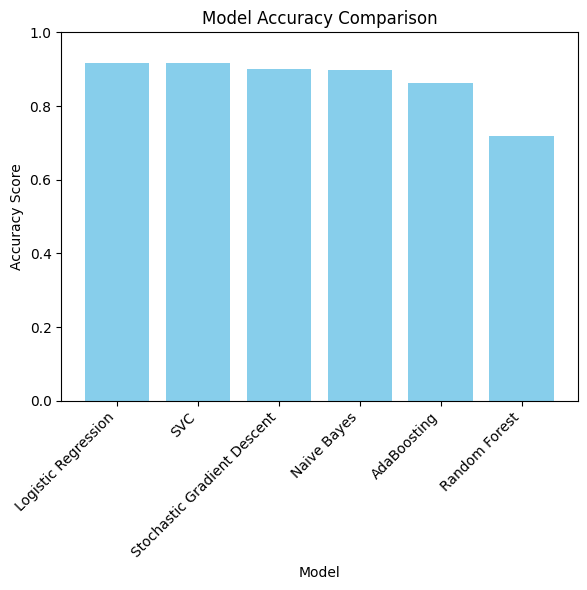

In [91]:
plt.figure(figsize=(6, 6))
plt.bar(models['Model'], models['Score'], color='skyblue')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)  # Assuming accuracy scores are between 0 and 1
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

we got the best accuracy of 92 % for Logistic Regression model.

## DL modeling

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [98]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [99]:
df

,Review,Recommended
0,absolutely wonderful silky sexy comfortable,1
1,love sooo pretty happened find store glad bc n...,1
2,high hope really wanted work initially ordered...,0
3,love love love jumpsuit fun flirty fabulous ev...,1
4,flattering due adjustable front tie perfect le...,1
...,...,...
23478,surprised positive review product terrible cut...,0
23479,sure ordering see person first glad design wel...,1
23481,happy snag great price easy slip flattering cu...,1
23483,fit well see never would worked glad able try ...,0


In [100]:
df.shape

(21175, 2)

### Tokenization

In [101]:
vocab_size = 5000
embedding_dim = 16
max_len = 100
trunction_type='post'
padding_type='post'
oov_token = "<OOV>"

In [102]:
tokenize = Tokenizer(num_words = vocab_size, oov_token=oov_token)
tokenize.fit_on_texts(X_train)

### Creating word index

In [103]:
# The word index show us how words are mapped into numbers:
word_index = tokenize.word_index

### Converting tokens to numeric

In [104]:
#By use texts_to_sequences from the tokenizer we convert the words into sequences so that a complete sequence of numbers can represent every sentence.
X_train = tokenize.texts_to_sequences(X_train)
X_test = tokenize.texts_to_sequences(X_test)

In [105]:
X_train[9:11]

[[1147,
  624,
  3,
  128,
  2,
  268,
  130,
  672,
  168,
  4155,
  197,
  242,
  625,
  1148,
  553,
  237,
  86,
  1,
  45,
  975,
  1149,
  325,
  417,
  41,
  2,
  101,
  63,
  3103,
  72,
  79,
  73,
  269,
  30,
  2282,
  648,
  135,
  1149,
  79,
  73,
  269],
 [13,
  162,
  34,
  222,
  376,
  45,
  370,
  82,
  897,
  2496,
  1025,
  103,
  1066,
  239,
  239,
  31,
  26]]

### Fixing token counts of all documents (pad_sequences)

In [106]:
#Now we add padding to our data by using pad_sequencesfunction to make it uniform.
X_train_pad = pad_sequences(X_train,maxlen=max_len, padding=padding_type,
                            truncating=trunction_type)

X_test_pad = pad_sequences(X_test,maxlen=max_len, padding=padding_type,
                           truncating=trunction_type)

## GloVe Embeddings

We use pre-trained word embeddings to create own embedding layer. We loading the Glove embeddings and append them to a dictionary.

Next we use this dictionary to create an embedding matrix for each word in the training set.

In [107]:


embeddings_index = {}

with open('/content/drive/My Drive/Colab Notebooks/glove.6B.100d.txt', 'r', encoding='utf-8') as file:
    for line in file:
        values = line.split()
        word = values[0]
        try:
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
        except ValueError:
            pass

print('Found %s word vectors.' % len(embeddings_index))


Found 400000 word vectors.


In [108]:
num_words = len(word_index) + 1

embedding_matrix = np.zeros((num_words, max_len))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [109]:
# Finally we create the embedding layer:
embedding_layer = Embedding(num_words,
                            max_len,
                            weights=[embedding_matrix],
                            input_length=max_len,
                            trainable=False)

### Modeling

In [128]:
# with strategy.scope():

#     model = Sequential([
#     embedding_layer,
#     Bidirectional(LSTM(embedding_dim, return_sequences=True)),
#     Bidirectional(LSTM(embedding_dim)),
#     Dense(6, activation='relu'),
#     Dense(1, activation='sigmoid')
# ])
# model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# model.summary()

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense

# TPU Initialization
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.experimental.TPUStrategy(resolver)

# Define the model within strategy.scope()
with strategy.scope():
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
        Bidirectional(LSTM(embedding_dim, return_sequences=True)),
        Bidirectional(LSTM(embedding_dim)),
        Dense(6, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           80000     
                                                                 
 bidirectional_4 (Bidirectio  (None, 100, 32)          4224      
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 32)               6272      
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 6)                 198       
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 90,701
Trainable params: 90,701
Non-trai

In [129]:
#We train the model for 10 epoch:
history = model.fit(X_train_pad, y_train,
                    batch_size=32,
                    epochs=10,
                    validation_data=(X_test_pad, y_test),
                    verbose=1)

Epoch 1/10
530/530 [==============================] - 47s 57ms/step - loss: 0.3556 - accuracy: 0.8440 - val_loss: 0.2566 - val_accuracy: 0.9046
Epoch 2/10
530/530 [==============================] - 22s 42ms/step - loss: 0.2272 - accuracy: 0.9185 - val_loss: 0.2482 - val_accuracy: 0.8999
Epoch 3/10
530/530 [==============================] - 22s 41ms/step - loss: 0.1813 - accuracy: 0.9319 - val_loss: 0.2349 - val_accuracy: 0.9070
Epoch 4/10
530/530 [==============================] - 21s 40ms/step - loss: 0.1413 - accuracy: 0.9478 - val_loss: 0.2632 - val_accuracy: 0.9079
Epoch 5/10
530/530 [==============================] - 22s 41ms/step - loss: 0.1184 - accuracy: 0.9580 - val_loss: 0.2688 - val_accuracy: 0.9001
Epoch 6/10
530/530 [==============================] - 22s 42ms/step - loss: 0.0990 - accuracy: 0.9684 - val_loss: 0.2851 - val_accuracy: 0.9041
Epoch 7/10
530/530 [==============================] - 22s 41ms/step - loss: 0.0861 - accuracy: 0.9731 - val_loss: 0.3226 - val_accuracy:

In [130]:
#Predictions on a test set:
loss, accuracy = model.evaluate(X_test_pad,y_test)
print('Test accuracy :', accuracy)

133/133 [==============================] - 6s 25ms/step - loss: 0.3680 - accuracy: 0.8895
Test accuracy : 0.8894923329353333


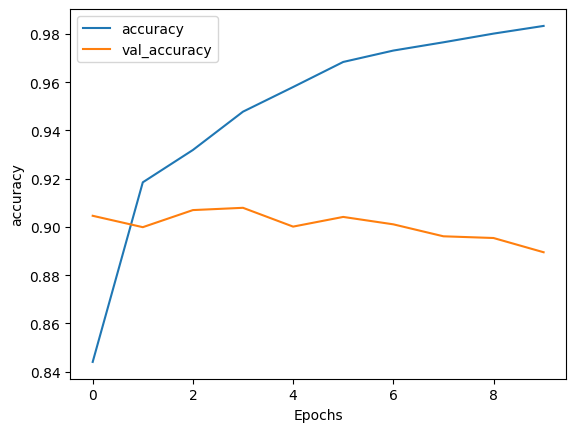

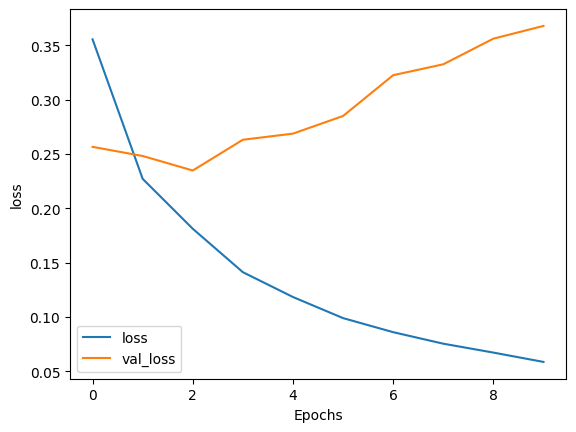

In [131]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

#### Model 2

In [132]:
#We also test a second model with a Dropout layer for decrease overfitting and we increase number of epochs to 20.

model2 = Sequential([
    embedding_layer,
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adam(lr=1e-4)
model2.compile(loss='binary_crossentropy',
               optimizer=optimizer,
               metrics=['accuracy'])

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          1073200   
                                                                 
 bidirectional_6 (Bidirectio  (None, 100, 128)         84480     
 nal)                                                            
                                                                 
 bidirectional_7 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 16)                1040      
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [133]:
callbacks = EarlyStopping(monitor = 'val_accuracy',
                          mode = 'max',
                          patience = 10,
                          verbose = 1)
history2 = model2.fit(X_train_pad, y_train,
                    batch_size=32,
                    epochs=20,
                    validation_data=(X_test_pad, y_test),
                    verbose=1,
                    callbacks=callbacks)

Epoch 1/20
530/530 [==============================] - 59s 85ms/step - loss: 0.4021 - accuracy: 0.8353 - val_loss: 0.3432 - val_accuracy: 0.8538
Epoch 2/20
530/530 [==============================] - 42s 80ms/step - loss: 0.3093 - accuracy: 0.8691 - val_loss: 0.2697 - val_accuracy: 0.8860
Epoch 3/20
530/530 [==============================] - 42s 80ms/step - loss: 0.2766 - accuracy: 0.8846 - val_loss: 0.2440 - val_accuracy: 0.8989
Epoch 4/20
530/530 [==============================] - 42s 79ms/step - loss: 0.2488 - accuracy: 0.8967 - val_loss: 0.2399 - val_accuracy: 0.8966
Epoch 5/20
530/530 [==============================] - 41s 78ms/step - loss: 0.2341 - accuracy: 0.9055 - val_loss: 0.2327 - val_accuracy: 0.8999
Epoch 6/20
530/530 [==============================] - 42s 79ms/step - loss: 0.2107 - accuracy: 0.9195 - val_loss: 0.2247 - val_accuracy: 0.9058
Epoch 7/20
530/530 [==============================] - 42s 79ms/step - loss: 0.1943 - accuracy: 0.9253 - val_loss: 0.2302 - val_accuracy:

In [134]:
# Predictions:

loss, accuracy = model2.evaluate(X_test_pad,y_test)
print('Test accuracy :', accuracy)

133/133 [==============================] - 3s 26ms/step - loss: 0.6331 - accuracy: 0.8921
Test accuracy : 0.8920897245407104


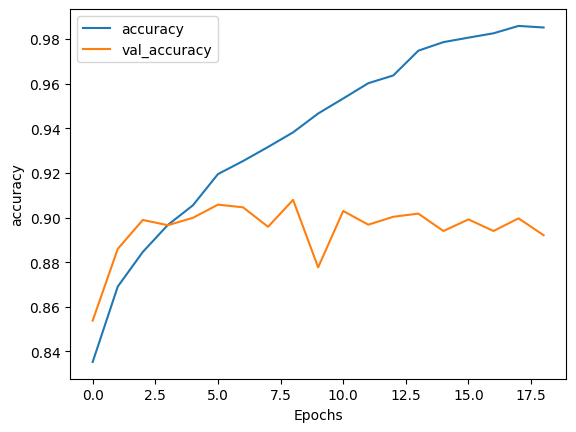

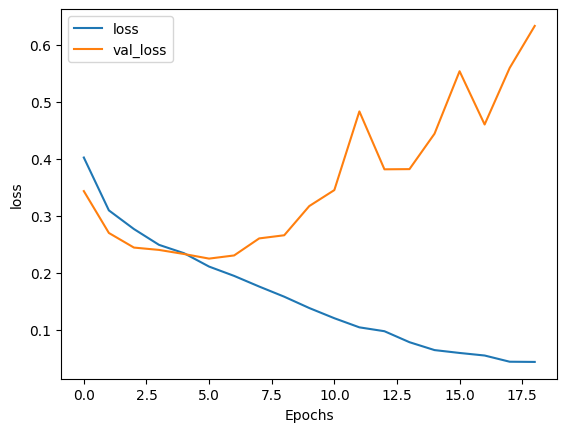

In [135]:
plot_graphs(history2, "accuracy")
plot_graphs(history2, "loss")

we achieved an accuracy on the test set 89%. and it is a good result in comparison to previous Machine Learning models that we have used (e.g. Logistic Regression).

## BERT Modeling

In [136]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 31.6 MB/s eta 0:00:00


### Tokenization

In [137]:
X

0              absolutely wonderful silky sexy comfortable
1        love sooo pretty happened find store glad bc n...
2        high hope really wanted work initially ordered...
3        love love love jumpsuit fun flirty fabulous ev...
4        flattering due adjustable front tie perfect le...
                               ...                        
23478    surprised positive review product terrible cut...
23479    sure ordering see person first glad design wel...
23481    happy snag great price easy slip flattering cu...
23483    fit well see never would worked glad able try ...
23485    lovely platinum feminine fit perfectly easy co...
Name: Review, Length: 21175, dtype: object

In [138]:
from transformers import AutoTokenizer #BertTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# For every sentence...
num_of_sent_tokens = []
for sent in X:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.

    input_ids = tokenizer.encode(sent,
                                 add_special_tokens=True)
    num_of_sent_tokens.append(len(input_ids))

print('Max sentence length: ', max(num_of_sent_tokens))

(…)cased/resolve/main/tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

(…)rt-base-uncased/resolve/main/config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

(…)bert-base-uncased/resolve/main/vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

(…)base-uncased/resolve/main/tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Max sentence length:  73


In [139]:
np.array(num_of_sent_tokens).mean()

30.118110979929163

In [140]:
sum(np.array(num_of_sent_tokens) <= 162) / len(num_of_sent_tokens)

1.0

In [141]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,
                                                        y,
                                                        test_size=0.1,
                                                        stratify=y,
                                                        random_state=101)

In [142]:
all_sentence_tokens = tokenizer(list(X),
                                max_length=162,
                                truncation=True,
                                padding='max_length',
                                add_special_tokens=True)


In [143]:
np.array(all_sentence_tokens['input_ids'])

array([[  101,  7078,  6919, ...,     0,     0,     0],
       [  101,  2293, 17111, ...,     0,     0,     0],
       [  101,  2152,  3246, ...,     0,     0,     0],
       ...,
       [  101,  3407,  1055, ...,     0,     0,     0],
       [  101,  4906,  2092, ...,     0,     0,     0],
       [  101,  8403,  8899, ...,     0,     0,     0]])

In [144]:
np.array(all_sentence_tokens['attention_mask'])

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [145]:
# Print the keys in the all_sentence_tokens dictionary
print(all_sentence_tokens.keys())


dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])


In [146]:
def transformation(X):
  # set array dimensions
  seq_len = 162

  all_sentence_tokens = tokenizer(list(X),
                                  max_length=seq_len,
                                  truncation=True,
                                  padding='max_length',
                                  add_special_tokens=True)

  return np.array(all_sentence_tokens['input_ids']), np.array(all_sentence_tokens['attention_mask'])

In [147]:
Xids_train, Xmask_train = transformation(X_train2)

Xids_test, Xmask_test = transformation(X_test2)

In [148]:
Xids_train

array([[  101,  7078, 23677, ...,     0,     0,     0],
       [  101,  2204,  8875, ...,     0,     0,     0],
       [  101,  5949,  2769, ...,     0,     0,     0],
       ...,
       [  101,  2514,  2066, ...,     0,     0,     0],
       [  101,  3641,  2235, ...,     0,     0,     0],
       [  101,  3376,  3866, ...,     0,     0,     0]])

In [149]:
print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)
print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)

Xids_train.shape  : (19057, 162)
Xmask_train.shape : (19057, 162)
Xids_test.shape   : (2118, 162)
Xmask_test.shape  : (2118, 162)


In [150]:
labels_train = np.array(y_train2).reshape(-1, 1)
labels_train

array([[1],
       [1],
       [0],
       ...,
       [1],
       [1],
       [0]])

In [151]:
labels_test = np.array(y_test2).reshape(-1,1)
labels_test

array([[0],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [152]:
import tensorflow as tf

dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train,
                                                    Xmask_train,
                                                    labels_train))
dataset_train

<_TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

### Transformation Matrix to Tensorflow tensor

In [153]:
import tensorflow as tf

dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train,
                                                    Xmask_train,
                                                    labels_train))
dataset_train

<_TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [154]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test,
                                                   Xmask_test,
                                                   labels_test))
dataset_test

<_TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [155]:
def map_func(Tensor_Xids, Tensor_Xmask, Tensor_labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Tensor_Xids, 'attention_mask': Tensor_Xmask}, Tensor_labels

In [156]:
# then we use the dataset map method to apply this transformation
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func)

In [157]:
dataset_train

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [158]:
dataset_test

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

### Batch Size

In [159]:
batch_size = 32

# batch_size
# fit into a batch of 32
train_ds = dataset_train.batch(batch_size)
val_ds = dataset_test.batch(batch_size)


###AdamW optimization

In [160]:
!pip install -q tf-models-official

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 65.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 57.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 55.0 MB/s eta 0:00:00


In [161]:
from official.nlp import optimization
epochs = 2
#batch_size = 32
steps_per_epoch = len(train_ds)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 2e-5  # 3e-5, 5e-5
optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [162]:
print(len(train_ds)*2)
print(int(0.1*len(train_ds)*2))

1192
119


### Creating Model

In [193]:
def create_model():
    from transformers import TFAutoModel
    model = TFAutoModel.from_pretrained("bert-base-uncased")
    input_ids = tf.keras.layers.Input(shape=(162,), name='input_ids', dtype='int32')
    attention_mask = tf.keras.layers.Input(shape=(162,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]

    x = tf.keras.layers.Dense(162, activation='relu')(embeddings)
    x = tf.keras.layers.Dropout(0.1, name="dropout")(x) #0.1
    y = tf.keras.layers.Dense(1, activation='sigmoid', name='outputs')(x)

    return tf.keras.Model(inputs=[input_ids, attention_mask], outputs=y)

In [194]:
with strategy.scope():

  optimizer = optimizer
  loss = tf.keras.losses.BinaryCrossentropy()
  recall = tf.keras.metrics.Recall()
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss=loss, metrics=[recall])

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [195]:
model3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 162)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 162)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 162,                                           

### Model Fiting

In [196]:
history = model3.fit(
    train_ds, validation_data= val_ds,
    epochs=epochs)

Epoch 1/2
596/596 [==============================] - 287s 219ms/step - loss: 0.2583 - recall: 0.9510 - val_loss: 0.1986 - val_recall: 0.9346
Epoch 2/2
596/596 [==============================] - 77s 130ms/step - loss: 0.1668 - recall: 0.9641 - val_loss: 0.1965 - val_recall: 0.9537


### Model evaluation

In [197]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model3.predict(val_ds) >= 0.5

y_test = [j for i in val_ds for j in np.array(i[1])]


print(classification_report(y_test, y_pred))

Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7a6ea6b1b760>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7a6ea6b1b760>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
67/67 [==============================] - 18s 164ms/step


Exception ignored in: <function Executor.__del__ at 0x7a70281d2ef0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


              precision    recall  f1-score   support

           0       0.79      0.79      0.79       391
           1       0.95      0.95      0.95      1727

    accuracy                           0.92      2118
   macro avg       0.87      0.87      0.87      2118
weighted avg       0.92      0.92      0.92      2118



In [198]:
y_train_pred = model3.predict(train_ds) >= 0.5

y_train = [j for i in train_ds for j in np.array(i[1])]

print(classification_report(y_train, y_train_pred))

596/596 [==============================] - 24s 36ms/step


Exception ignored in: <function Executor.__del__ at 0x7a70281d2ef0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


              precision    recall  f1-score   support

           0       0.89      0.94      0.92      3523
           1       0.99      0.97      0.98     15534

    accuracy                           0.97     19057
   macro avg       0.94      0.96      0.95     19057
weighted avg       0.97      0.97      0.97     19057



67/67 [==============================] - 3s 27ms/step


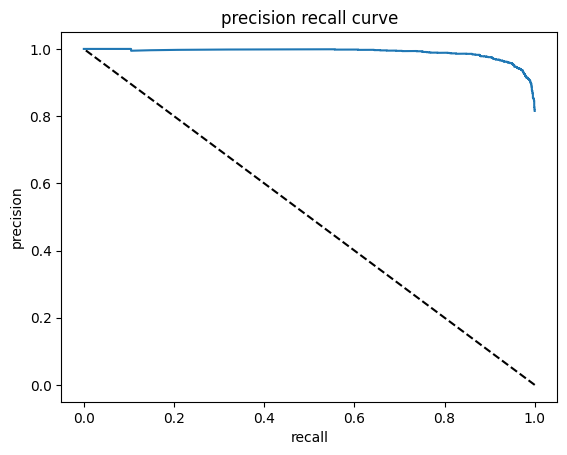

In [199]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

y_pred_proba = model3.predict(val_ds)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision recall curve')
plt.show()

In [202]:
average_precision_score(y_test, y_pred_proba)


0.9904245130729183

In [205]:
from sklearn.metrics import f1_score,recall_score

In [206]:
BERT_without_weighted_AP = average_precision_score(y_test, y_pred_proba)
BERT_without_weighted_f1 = f1_score(y_test, y_pred)
BERT_without_weighted_rec = recall_score(y_test, y_pred)

## BERT Model with Weighted

In [207]:
pd.Series(y).value_counts(normalize=True)


1    0.815159
0    0.184841
Name: Recommended, dtype: float64

In [208]:
weights = {0:0.2, 1:0.8}


In [209]:
history = model3.fit(
    train_ds, validation_data= val_ds,
    epochs=epochs, class_weight=weights)

Epoch 1/2
596/596 [==============================] - 191s 199ms/step - loss: 0.0344 - recall: 0.9925 - val_loss: 0.2668 - val_recall: 0.9728
Epoch 2/2
596/596 [==============================] - 70s 117ms/step - loss: 0.0233 - recall: 0.9951 - val_loss: 0.3077 - val_recall: 0.9560


In [211]:
y_pred = model3.predict(val_ds) >= 0.5

y_test = [j for i in val_ds for j in np.array(i[1])]


print(classification_report(y_test, y_pred))

67/67 [==============================] - 4s 30ms/step


Exception ignored in: <function Executor.__del__ at 0x7a70281d2ef0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


              precision    recall  f1-score   support

           0       0.80      0.77      0.78       391
           1       0.95      0.96      0.95      1727

    accuracy                           0.92      2118
   macro avg       0.87      0.86      0.87      2118
weighted avg       0.92      0.92      0.92      2118



In [212]:
y_train_pred = model3.predict(train_ds) >= 0.5

y_train = [j for i in train_ds for j in np.array(i[1])]

print(classification_report(y_train, y_train_pred))

596/596 [==============================] - 19s 29ms/step


Exception ignored in: <function Executor.__del__ at 0x7a70281d2ef0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


              precision    recall  f1-score   support

           0       0.95      0.98      0.97      3523
           1       0.99      0.99      0.99     15534

    accuracy                           0.99     19057
   macro avg       0.97      0.98      0.98     19057
weighted avg       0.99      0.99      0.99     19057



In [213]:
y_pred_proba = model3.predict(val_ds)
average_precision_score(y_test, y_pred_proba)

67/67 [==============================] - 3s 29ms/step


0.9893169304201304

In [214]:
BERT_with_weighted_AP = average_precision_score(y_test, y_pred_proba)
BERT_with_weighted_f1 = f1_score(y_test, y_pred)
BERT_with_weighted_rec = recall_score(y_test, y_pred)

## BERT Large Uncased


In [218]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-large-uncased")

max_len = 0

# For every sentence...
max_token = []
for sent in X:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.

    input_ids = tokenizer.encode(sent.lower(), add_special_tokens=True)
    max_token.append(len(input_ids))

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

(…)cased/resolve/main/tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

(…)t-large-uncased/resolve/main/config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

(…)ert-large-uncased/resolve/main/vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

(…)arge-uncased/resolve/main/tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Max sentence length:  73


In [219]:
def transformation(X):
  # set array dimensions
  seq_len = 162
  num_samples = len(X)

  # initialize empty zero arrays
  Xids = np.zeros((num_samples, seq_len))
  Xmask = np.zeros((num_samples, seq_len))


  for i, phrase in enumerate(X):
      tokens = tokenizer.encode_plus(phrase.lower(), max_length=seq_len, truncation=True,
                                      padding='max_length', add_special_tokens=True)
      # assign tokenized outputs to respective rows in numpy arrays
      Xids[i, :] = tokens['input_ids']
      Xmask[i, :] = tokens['attention_mask']
  return Xids, Xmask

In [220]:
Xids, Xmask = transformation(X)


In [223]:
labels = y.values.reshape(-1, 1)
labels

array([[1],
       [1],
       [0],
       ...,
       [1],
       [0],
       [1]])

In [224]:
import tensorflow as tf

dataset = tf.data.Dataset.from_tensor_slices((Xids, Xmask, labels)) #tf.data.Dataset.from_tensors((Xids, Xmask, labels))

def map_func(Xids, Xmask, labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Xids, 'attention_mask': Xmask}, labels

# then we use the dataset map method to apply this transformation
dataset = dataset.map(map_func)

In [225]:
batch_size = 32

# shuffle and batch
# fit into a batch of 16
dataset = dataset.shuffle(21500, reshuffle_each_iteration=False).batch(batch_size, drop_remainder=True)


In [226]:
# set split size (90% training data) and calculate training set size
split = 0.9
size = int(len(dataset)*split) #int((Xids.shape[0]/batch_size)*split)

# get training and validation sets
train_ds = dataset.take(size)
val_ds = dataset.skip(size)

In [227]:
!pip install -q tf-models-official


In [228]:
from official.nlp import optimization
epochs = 1
#batch_size = 32
steps_per_epoch = len(train_ds)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 2e-5  # 3e-5, 5e-5
optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')


In [229]:
def create_model():
    from transformers import TFAutoModel
    model = TFAutoModel.from_pretrained("bert-large-uncased")
    input_ids = tf.keras.layers.Input(shape=(162,), name='input_ids', dtype='int32')
    attention_mask = tf.keras.layers.Input(shape=(162,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]

    x = tf.keras.layers.Dense(162, activation='relu')(embeddings)
    x = tf.keras.layers.Dropout(0.1, name="dropout")(x) #0.1
    y = tf.keras.layers.Dense(1, activation='sigmoid', name='outputs')(x)

    return tf.keras.Model(inputs=[input_ids, attention_mask], outputs=y)


In [230]:
with strategy.scope():

  optimizer = optimizer
  loss = tf.keras.losses.BinaryCrossentropy()
  recall = tf.keras.metrics.Recall()
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss=loss, metrics=[recall])


model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [231]:
model3.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 162)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 162)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  335141888   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 162,                                         

In [232]:
history = model3.fit(
    train_ds, validation_data= val_ds,
    epochs=epochs)

594/594 [==============================] - 293s 277ms/step - loss: 0.2924 - recall_1: 0.9599 - val_loss: 0.2363 - val_recall_1: 0.9647


In [233]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model3.predict(val_ds) >= 0.5

y_test = [j for i in val_ds for j in np.array(i[1])]


print(classification_report(y_test, y_pred))

Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7a6e77801360>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7a6e77801360>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
67/67 [==============================] - 17s 175ms/step


Exception ignored in: <function Executor.__del__ at 0x7a70281d2ef0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


              precision    recall  f1-score   support

           0       0.81      0.70      0.75       386
           1       0.94      0.96      0.95      1758

    accuracy                           0.92      2144
   macro avg       0.87      0.83      0.85      2144
weighted avg       0.91      0.92      0.91      2144



In [234]:
y_train_pred = model3.predict(train_ds) >= 0.5

y_train = [j for i in train_ds for j in np.array(i[1])]

print(classification_report(y_train, y_train_pred))

594/594 [==============================] - 32s 52ms/step


Exception ignored in: <function Executor.__del__ at 0x7a70281d2ef0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/executor.py", line 46, in __del__
    self.wait()
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/executor.py", line 65, in wait
    pywrap_tfe.TFE_ExecutorWaitForAllPendingNodes(self._handle)
tensorflow.python.framework.errors_impl.OutOfRangeError: End of sequence


              precision    recall  f1-score   support

           0       0.86      0.81      0.83      3526
           1       0.96      0.97      0.96     15482

    accuracy                           0.94     19008
   macro avg       0.91      0.89      0.90     19008
weighted avg       0.94      0.94      0.94     19008



67/67 [==============================] - 5s 57ms/step


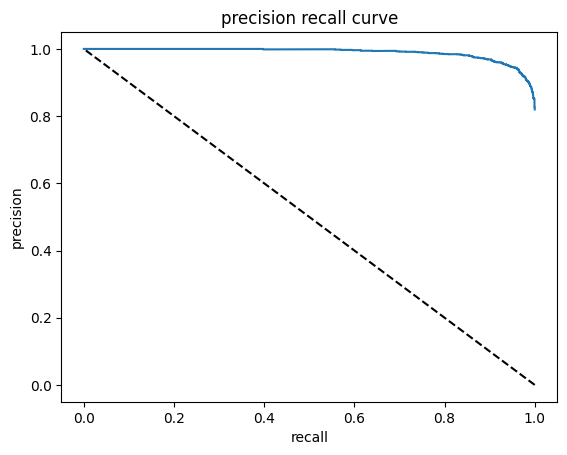

In [235]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

y_pred_proba = model3.predict(val_ds)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision recall curve')
plt.show()

In [236]:
average_precision_score(y_test, y_pred_proba)

0.9895319135469899

###GPT Model

In [238]:
# from transformers import GPT2Tokenizer, GPT2Model

# tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
# model = GPT2Model.from_pretrained('gpt2')



___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___